# 1. Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Loading the dataset

In [4]:
df = pd.read_csv("./FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 3. Eploring the dataset

In [33]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]


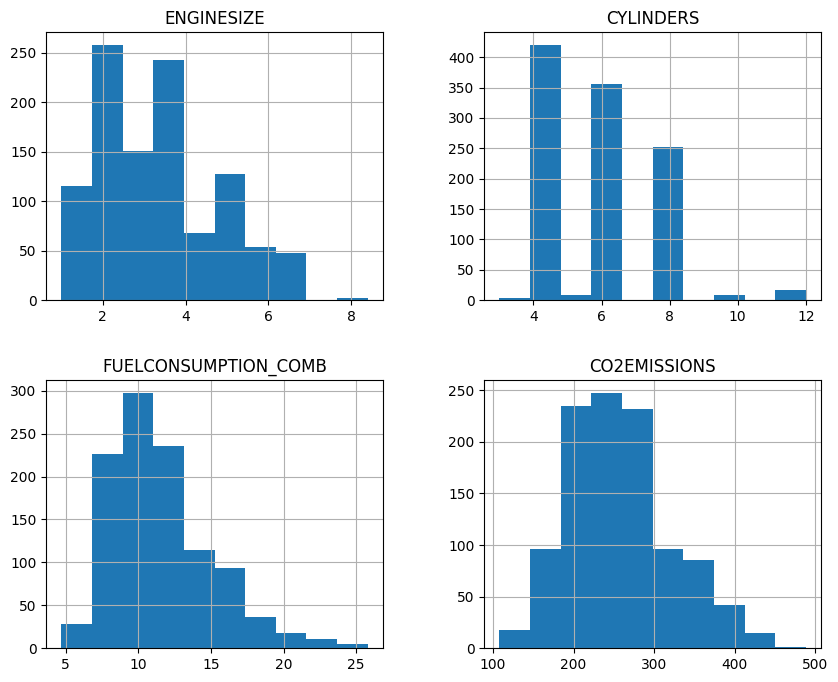

In [10]:
visualize = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

visualize.hist(figsize = (10, 8))
plt.show()

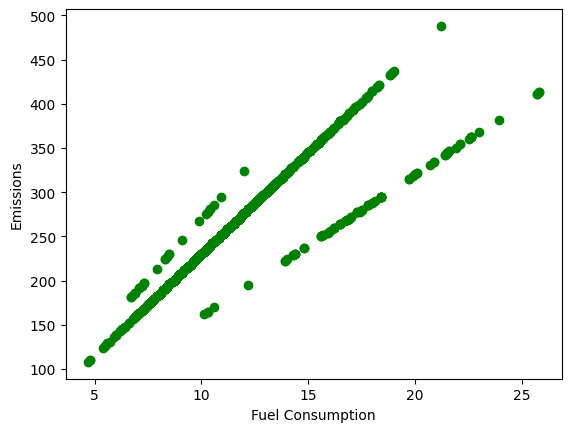

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "green")
plt.xlabel("Fuel Consumption")
plt.ylabel("Emissions")
plt.show()

##### From the above chart, we can see that there is a linear or strong relationship between 'fuel consumption' and 'emission'. In other words, the more fuel a vehicle consumes, the more emissions it produces.

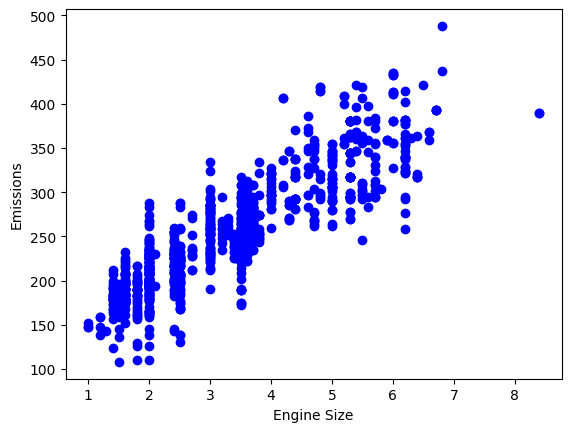

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

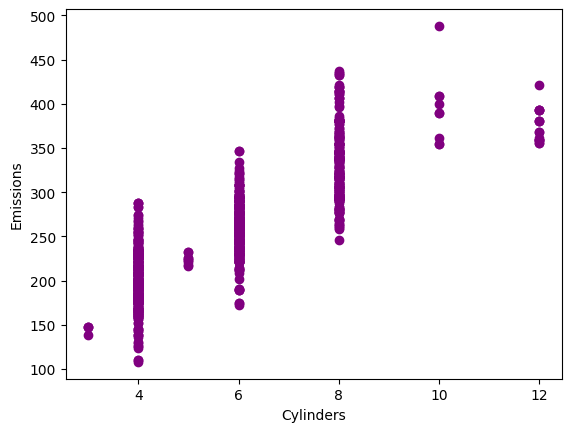

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "purple")
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

# 4. Splitting the data

In [15]:
mask = np.random.rand(len(df)) < 0.8

train = cdf[mask]
test = cdf[~mask]

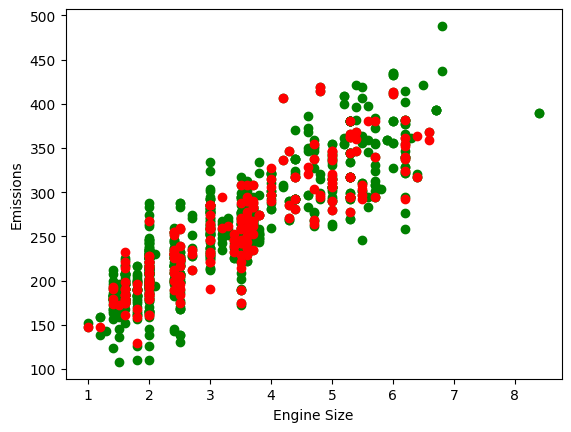

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "green")
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = "red")

plt.xlabel("Engine Size")
plt.ylabel("Emissions")

plt.show()

# 5. Modelling

In [25]:
from sklearn import linear_model

reg_model = linear_model.LinearRegression()

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

reg_model.fit(train_x, train_y)


# the coefficeients

print("Coefficients: ", reg_model.coef_)

print("Intercepts: ", reg_model.intercept_)

Coefficients:  [[39.26153377]]
Intercepts:  [125.07359557]


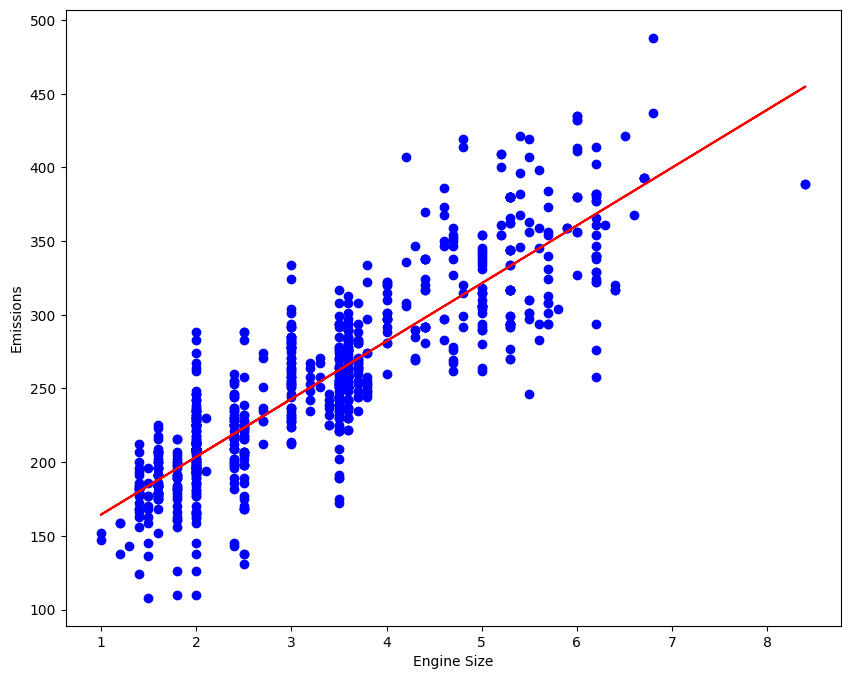

In [28]:
plt.figure(figsize = (10, 8))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")

plt.plot(train_x, reg_model.coef_[0][0] * train_x + reg_model.intercept_[0], "-r")

plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

# 6. Model Evaluation

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

y_preds = reg_model.predict(test_x)

print("MSE: ", mean_squared_error(test_y, y_preds))
print("MAE: ", mean_absolute_error(test_y, y_preds))
print("r2_score: ", r2_score(test_y, y_preds) * 100)

MSE:  882.6084028508143
MAE:  22.831981001302555
r2_score:  76.73021583395125
